### Configuration

In [16]:
# import

import pandas as pd
import glob
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# path

SOURCE_FOLDER = 'Dataset'
DATASET_PATH = 'dataset-farandi'
RAW_DATASET_PATH = f"{DATASET_PATH}/raw-data"
CSV_PATH = f"{DATASET_PATH}/csv-data"
COMBINED_DATA = f"{DATASET_PATH}/combined-data.csv"
CLEANED_DATA = f"{DATASET_PATH}/cleaned-data.csv"
FILLED_DATA = f"{DATASET_PATH}/filled-data.csv"

os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(RAW_DATASET_PATH, exist_ok=True)
os.makedirs(CSV_PATH, exist_ok=True)

# Loading Dataset

In [8]:
# clone data from Dataset folder to my folder

for file_name in os.listdir(SOURCE_FOLDER):
    if file_name.endswith(".xlsx"):
        source_path = os.path.join(SOURCE_FOLDER, file_name)
        destination_path = os.path.join(RAW_DATASET_PATH, file_name)
        shutil.copy2(source_path, destination_path)
        print(f"Copied: {file_name}")

Copied: 1-laporan_iklim_harian.xlsx
Copied: 10-laporan_iklim_harian.xlsx
Copied: 11-laporan_iklim_harian.xlsx
Copied: 12-laporan_iklim_harian.xlsx
Copied: 13-laporan_iklim_harian.xlsx
Copied: 14-laporan_iklim_harian.xlsx
Copied: 15-laporan_iklim_harian.xlsx
Copied: 16-laporan_iklim_harian.xlsx
Copied: 17-laporan_iklim_harian.xlsx
Copied: 18-laporan_iklim_harian.xlsx
Copied: 19-laporan_iklim_harian.xlsx
Copied: 2-laporan_iklim_harian.xlsx
Copied: 20-laporan_iklim_harian.xlsx
Copied: 21-laporan_iklim_harian.xlsx
Copied: 22-laporan_iklim_harian.xlsx
Copied: 23-laporan_iklim_harian.xlsx
Copied: 24-laporan_iklim_harian.xlsx
Copied: 25-laporan_iklim_harian.xlsx
Copied: 26-laporan_iklim_harian.xlsx
Copied: 27-laporan_iklim_harian.xlsx
Copied: 28-laporan_iklim_harian.xlsx
Copied: 29-laporan_iklim_harian.xlsx
Copied: 3-laporan_iklim_harian.xlsx
Copied: 30-laporan_iklim_harian.xlsx
Copied: 31-laporan_iklim_harian.xlsx
Copied: 32-laporan_iklim_harian.xlsx
Copied: 33-laporan_iklim_harian.xlsx
Copi

In [11]:
# build csv data

# Loop through all Excel files in the source folder
for filename in os.listdir(RAW_DATASET_PATH):
    if filename.endswith(".xlsx"):
        xlsx_path = os.path.join(RAW_DATASET_PATH, filename)
        
        # Read Excel file and find the header row containing "TANGGAL"
        df_raw = pd.read_excel(xlsx_path, header=None)
        header_row = None
        
        for i, row in df_raw.iterrows():
            if "TANGGAL" in str(row.values):
                header_row = i
                break
        
        if header_row is not None:
            # Read again using the detected header row
            df = pd.read_excel(xlsx_path, skiprows=header_row)
            
            # Drop completely empty columns and rows
            df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

            # Sometimes "KETERANGAN" starts a block — remove any rows after that too
            if df_raw[df_raw.iloc[:, 0].astype(str).str.contains("KETERANGAN", case=False, na=False)].index.size > 0:
                keterangan_row = df_raw[df_raw.iloc[:, 0].astype(str).str.contains("KETERANGAN", case=False, na=False)].index[0]
                # Remove rows that were after KETERANGAN in the original data
                df = df[df.index < keterangan_row - header_row - 1]

            
            # Output CSV path
            csv_name = os.path.splitext(filename)[0] + ".csv"
            csv_path = os.path.join(CSV_PATH, csv_name)
            
            # Save to CSV (no index)
            df.to_csv(csv_path, index=False)
            print(f"✅ Saved data from '{filename}' to '{csv_name}'")
        else:
            print(f"⚠️ No table header found in {filename}")


✅ Saved data from '1-laporan_iklim_harian.xlsx' to '1-laporan_iklim_harian.csv'
✅ Saved data from '10-laporan_iklim_harian.xlsx' to '10-laporan_iklim_harian.csv'
✅ Saved data from '11-laporan_iklim_harian.xlsx' to '11-laporan_iklim_harian.csv'
✅ Saved data from '12-laporan_iklim_harian.xlsx' to '12-laporan_iklim_harian.csv'
✅ Saved data from '13-laporan_iklim_harian.xlsx' to '13-laporan_iklim_harian.csv'
✅ Saved data from '14-laporan_iklim_harian.xlsx' to '14-laporan_iklim_harian.csv'
✅ Saved data from '15-laporan_iklim_harian.xlsx' to '15-laporan_iklim_harian.csv'
✅ Saved data from '16-laporan_iklim_harian.xlsx' to '16-laporan_iklim_harian.csv'
✅ Saved data from '17-laporan_iklim_harian.xlsx' to '17-laporan_iklim_harian.csv'
✅ Saved data from '18-laporan_iklim_harian.xlsx' to '18-laporan_iklim_harian.csv'
✅ Saved data from '19-laporan_iklim_harian.xlsx' to '19-laporan_iklim_harian.csv'
✅ Saved data from '2-laporan_iklim_harian.xlsx' to '2-laporan_iklim_harian.csv'
✅ Saved data from '2

In [9]:
# Create Combined CSV and map the column name

# List all CSV files in the folder
csv_files = [f for f in os.listdir(CSV_PATH) if f.endswith(".csv")]

combined_df = []

for file in csv_files:
    file_path = os.path.join(CSV_PATH, file)
    
    # Read CSV
    df = pd.read_csv(file_path)
    combined_df.append(df)

# Combine all dataframes
final_df = pd.concat(combined_df, ignore_index=True)

rename_map = {
    "TANGGAL": "Tanggal",
    "TN": "Temperatur minimum (°C)",
    "TX": "Temperatur maksimum (°C)",
    "TAVG": "Temperatur rata-rata (°C)",
    "RH_AVG": "Kelembapan rata-rata (%)",
    "RR": "Curah hujan (mm)",
    "SS": "Lamanya penyinaran matahari (jam)",
    "FF_X": "Kecepatan angin maksimum (m/s)",
    "DDD_X": "Arah angin saat kecepatan maksimum (°)",
    "FF_AVG": "Kecepatan angin rata-rata (m/s)",
    "DDD_CAR": "Arah angin terbanyak (°)"
}

final_df = final_df.rename(columns=rename_map)

# Drop duplicates and clean up
final_df = final_df.drop_duplicates()

final_df.to_csv(COMBINED_DATA, index=False)

print(f"✅ Combined {len(csv_files)} CSV files into '{COMBINED_DATA}'")


✅ Combined 34 CSV files into 'dataset-farandi/combined-data.csv'


# EDA & Preprocessing

In [3]:
df = pd.read_csv(COMBINED_DATA)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Tanggal                                 1002 non-null   object 
 1   Temperatur minimum (°C)                 970 non-null    object 
 2   Temperatur maksimum (°C)                970 non-null    object 
 3   Temperatur rata-rata (°C)               1001 non-null   object 
 4   Kelembapan rata-rata (%)                1001 non-null   object 
 5   Curah hujan (mm)                        1001 non-null   object 
 6   Lamanya penyinaran matahari (jam)       970 non-null    object 
 7   Kecepatan angin maksimum (m/s)          970 non-null    float64
 8   Arah angin saat kecepatan maksimum (°)  970 non-null    float64
 9   Kecepatan angin rata-rata (m/s)         970 non-null    float64
 10  Arah angin terbanyak (°)                970 non-null    obje

In [ ]:
df.head()

,Tanggal,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),Curah hujan (mm),Lamanya penyinaran matahari (jam),Kecepatan angin maksimum (m/s),Arah angin saat kecepatan maksimum (°),Kecepatan angin rata-rata (m/s),Arah angin terbanyak (°)
0,01-01-2023,23.6,29.8,26.3,87.0,14.5,0,4.0,320.0,1.0,C
1,02-01-2023,24.2,29.4,27.5,81.0,31.5,0.7,4.0,320.0,2.0,NW
2,03-01-2023,25,29.6,26.6,82.0,0.5,0,6.0,316.0,1.0,C
3,04-01-2023,24.4,30.0,26.4,86.0,2.4,-,5.0,316.0,1.0,C
4,05-01-2023,24,32.6,27.4,83.0,35.3,-,4.0,317.0,2.0,C


In [4]:
non_numeric_columns = df.select_dtypes(exclude='number').columns
for col in non_numeric_columns:
    print(f"Unique values in column {col}:")
    print(df[col].unique())

Unique values in column Tanggal:
['01-01-2023' '02-01-2023' '03-01-2023' '04-01-2023' '05-01-2023'
 '06-01-2023' '07-01-2023' '08-01-2023' '09-01-2023' '10-01-2023'
 '11-01-2023' '12-01-2023' '13-01-2023' '14-01-2023' '15-01-2023'
 '16-01-2023' '17-01-2023' '18-01-2023' '19-01-2023' '20-01-2023'
 '21-01-2023' '22-01-2023' '23-01-2023' '24-01-2023' '25-01-2023'
 '26-01-2023' '27-01-2023' '28-01-2023' '29-01-2023' '30-01-2023'
 '31-01-2023' '01-10-2023' '02-10-2023' '03-10-2023' '04-10-2023'
 '05-10-2023' '06-10-2023' '07-10-2023' '08-10-2023' '09-10-2023'
 '10-10-2023' '11-10-2023' '12-10-2023' '13-10-2023' '14-10-2023'
 '15-10-2023' '16-10-2023' '17-10-2023' '18-10-2023' '19-10-2023'
 '20-10-2023' '21-10-2023' '22-10-2023' '23-10-2023' '24-10-2023'
 '25-10-2023' '26-10-2023' '27-10-2023' '28-10-2023' '29-10-2023'
 '30-10-2023' '31-10-2023' '01-11-2023' '02-11-2023' '03-11-2023'
 '04-11-2023' '05-11-2023' '06-11-2023' '07-11-2023' '08-11-2023'
 '09-11-2023' '10-11-2023' '11-11-2023' '12

In [5]:
# 1️⃣ Clean whitespace in column names and string values
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# 2️⃣ Replace special invalid values
df.replace(
    {
        '-': np.nan,
        '8,888': np.nan,
        '8888': np.nan,
        '9999': np.nan
    },
    inplace=True
)

# 3️⃣ Convert comma decimal to dot if present (e.g., "8,5" → "8.5")
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.replace(',', '.', regex=False)

# 4️⃣ Convert numeric columns properly
numeric_cols = [
    "Temperatur minimum (°C)",
    "Temperatur maksimum (°C)",
    "Temperatur rata-rata (°C)",
    "Kelembapan rata-rata (%)",
    "Curah hujan (mm)",
    "Lamanya penyinaran matahari (jam)",
    "Kecepatan angin maksimum (m/s)",
    "Arah angin saat kecepatan maksimum (°)",
    "Kecepatan angin rata-rata (m/s)"
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 5️⃣ Convert Tanggal to datetime (YYYY-MM-DD)
df["Tanggal"] = pd.to_datetime(df["Tanggal"], format="%d-%m-%Y", errors="coerce")

# 7️⃣ Drop duplicate rows and reset index
df = df.drop_duplicates().reset_index(drop=True)

# # 8️⃣ Save preprocessed CSV
# df.to_csv(CLEANED_DATA, index=False)

# print(f"✅ Preprocessed data saved to '{CLEANED_DATA}'")
# print(f"✅ Total rows: {len(df)}")


In [6]:
# 6️⃣ Sort by Tanggal
df = df.sort_values(by="Tanggal", ascending=True)

In [7]:
col = "Arah angin terbanyak (°)"

# Clean and normalize text
df[col] = df[col].astype(str).str.strip().str.upper().replace({"NAN": np.nan})
df.loc[df[col] == '', col] = np.nan

# Create is_calm indicator (1 if 'C' or NaN, 0 otherwise)
df["is_calm"] = df[col].isin(["C", np.nan]).astype(int)

# Map compass directions to degrees
compass_to_deg = {
    "N":0, "NNE":22.5, "NE":45, "ENE":67.5, "E":90, "ESE":112.5, "SE":135, "SSE":157.5,
    "S":180, "SSW":202.5, "SW":225, "WSW":247.5, "W":270, "WNW":292.5, "NW":315, "NNW":337.5
}
df["wind_deg"] = df[col].map(compass_to_deg)

# Compute radians (ignore NaN)
df["wind_rad"] = np.deg2rad(df["wind_deg"])

# Compute sin and cos (circular encoding)
df["wind_sin"] = np.sin(df["wind_rad"])
df["wind_cos"] = np.cos(df["wind_rad"])

# Fill calm or missing values with neutral (0,0)
df["wind_sin"].fillna(0, inplace=True)
df["wind_cos"].fillna(0, inplace=True)

# Clean up temporary columns
df.drop(columns=["wind_deg", "wind_rad", "Arah angin terbanyak (°)"], inplace=True)
df.head(10)

,Tanggal,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),Curah hujan (mm),Lamanya penyinaran matahari (jam),Kecepatan angin maksimum (m/s),Arah angin saat kecepatan maksimum (°),Kecepatan angin rata-rata (m/s),is_calm,wind_sin,wind_cos
0,2023-01-01,23.6,29.8,26.3,87.0,14.5,0.0,4.0,320.0,1.0,1,0.000000,0.000000
1,2023-01-02,24.2,29.4,27.5,81.0,31.5,0.7,4.0,320.0,2.0,0,-0.707107,0.707107
2,2023-01-03,25.0,29.6,26.6,82.0,0.5,0.0,6.0,316.0,1.0,1,0.000000,0.000000
3,2023-01-04,24.4,30.0,26.4,86.0,2.4,NaN,5.0,316.0,1.0,1,0.000000,0.000000
4,2023-01-05,24.0,32.6,27.4,83.0,35.3,NaN,4.0,317.0,2.0,1,0.000000,0.000000
5,2023-01-06,24.4,33.4,29.6,68.0,2.3,2.2,4.0,316.0,1.0,1,0.000000,0.000000
6,2023-01-07,27.0,33.8,29.6,70.0,0.0,6.2,4.0,340.0,2.0,1,0.000000,0.000000
7,2023-01-08,26.6,32.0,28.1,76.0,NaN,8.0,8.0,320.0,2.0,1,0.000000,0.000000
8,2023-01-09,NaN,32.6,29.0,73.0,NaN,3.8,5.0,320.0,3.0,0,-0.707107,0.707107
9,2023-01-10,27.2,34.4,30.1,65.0,NaN,5.0,6.0,320.0,1.0,1,0.000000,0.000000


In [8]:
# Convert 8888 and similar invalid rainfall values to NaN
df["Curah hujan (mm)"] = df["Curah hujan (mm)"].replace(8888, np.nan)

# Optional: also convert 9999 if it exists (tidak ada data)
df["Curah hujan (mm)"] = df["Curah hujan (mm)"].replace(9999, np.nan)

# If you want to confirm:
print(df["Curah hujan (mm)"].unique()[:20])

[14.5 31.5  0.5  2.4 35.3  2.3  0.   nan  3.  27.5 26.9 27.  31.8 25.2
  1.2 62.8  1.   9.6 25.8 40.8]


In [9]:
df.to_csv(CLEANED_DATA, index=False)

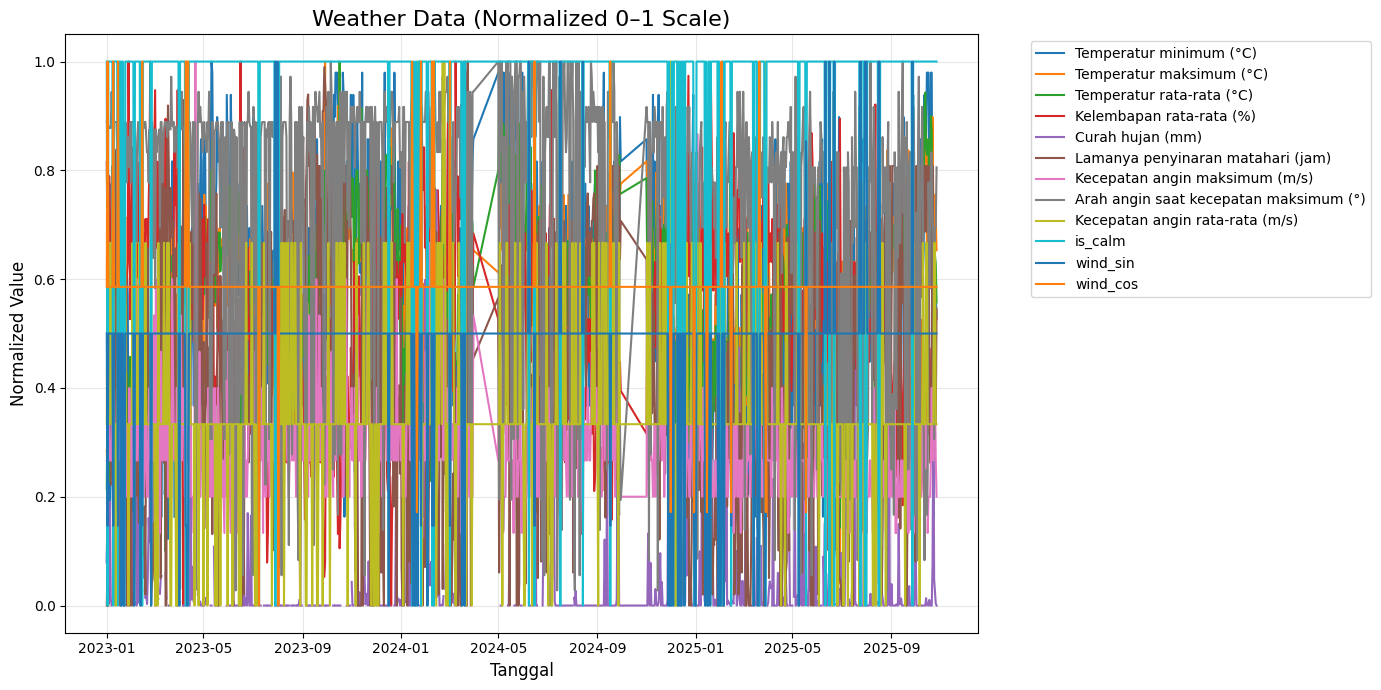

In [47]:
# Apply Min-Max normalization (0–1 scaling)
df_norm = df.copy()
df_norm[numeric_cols] = df[numeric_cols].apply(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

# Plot all normalized numeric columns
plt.figure(figsize=(14, 7))
for col in numeric_cols:
    plt.plot(df_norm["Tanggal"], df_norm[col], label=col)

plt.title("Weather Data (Normalized 0–1 Scale)", fontsize=16)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Normalized Value", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [48]:
df.describe()

,Temperatur minimum (°C),Temperatur maksimum (°C),Temperatur rata-rata (°C),Kelembapan rata-rata (%),Curah hujan (mm),Lamanya penyinaran matahari (jam),Kecepatan angin maksimum (m/s),Arah angin saat kecepatan maksimum (°),Kecepatan angin rata-rata (m/s),is_calm,wind_sin,wind_cos
count,940.000000,966.000000,966.000000,968.000000,781.000000,962.000000,970.000000,970.00000,970.000000,970.000000,970.000000,970.000000
mean,26.016277,32.755797,28.869979,75.650826,7.519206,4.283264,4.538144,264.15567,1.142268,0.918557,-0.037989,0.004499
std,1.013572,1.412851,1.045052,6.317682,17.222096,2.604515,1.703238,91.15690,0.553036,0.273656,0.257198,0.117948
min,23.200000,27.000000,24.800000,56.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,-1.000000
25%,25.200000,32.000000,28.300000,72.000000,0.000000,2.100000,3.000000,250.00000,1.000000,1.000000,0.000000,0.000000
50%,26.000000,33.000000,28.900000,76.000000,0.000000,4.500000,4.000000,300.00000,1.000000,1.000000,0.000000,0.000000
75%,26.800000,33.600000,29.575000,80.000000,5.700000,6.600000,5.000000,320.00000,1.000000,1.000000,0.000000,0.000000
max,28.100000,36.800000,31.800000,94.000000,184.800000,9.900000,15.000000,360.00000,3.000000,1.000000,1.000000,0.707107


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load data
df = pd.read_csv(CLEANED_DATA)

# Check missing values
print("Missing values before filling:\n", df.isna().sum())

# Loop over each column that has missing values
for target_col in df.columns:
    if df[target_col].isna().sum() > 0:
        print(f"\n🔧 Imputing missing values for column: {target_col}")

        # Split into complete and incomplete rows
        train_data = df[df[target_col].notna()]
        predict_data = df[df[target_col].isna()]

        if len(train_data) == 0:
            print(f"⚠️ No complete data for {target_col}, skipping.")
            continue

        # Use all other numeric columns except the target and Tanggal
        feature_cols = [c for c in df.columns if c not in [target_col, "Tanggal"]]

        X_train = train_data[feature_cols]
        y_train = train_data[target_col]
        X_pred = predict_data[feature_cols]

        # Train Random Forest
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict and round to 1 decimal place
        y_pred = model.predict(X_pred)
        y_pred = np.round(y_pred, 1)

        # Fill missing values
        df.loc[df[target_col].isna(), target_col] = y_pred

        print(f"✅ Filled {len(y_pred)} missing values for '{target_col}'.")

# Round all numeric columns to 1 decimal place
df = df.round(1)

# Check again after filling
print("\nMissing values after filling:\n", df.isna().sum())

# Save output
df.to_csv(FILLED_DATA, index=False)
print(f"\n💾 Saved filled dataset as {FILLED_DATA}")


Missing values before filling:
 Tanggal                                     0
Temperatur minimum (°C)                    61
Temperatur maksimum (°C)                   35
Temperatur rata-rata (°C)                   5
Kelembapan rata-rata (%)                    3
Curah hujan (mm)                          194
Lamanya penyinaran matahari (jam)          39
Kecepatan angin maksimum (m/s)             31
Arah angin saat kecepatan maksimum (°)     31
Kecepatan angin rata-rata (m/s)            31
is_calm                                     0
wind_sin                                    0
wind_cos                                    0
dtype: int64

🔧 Imputing missing values for column: Temperatur minimum (°C)
✅ Filled 61 missing values for 'Temperatur minimum (°C)'.

🔧 Imputing missing values for column: Temperatur maksimum (°C)
✅ Filled 35 missing values for 'Temperatur maksimum (°C)'.

🔧 Imputing missing values for column: Temperatur rata-rata (°C)
✅ Filled 5 missing values for 'Temperatur rata-r

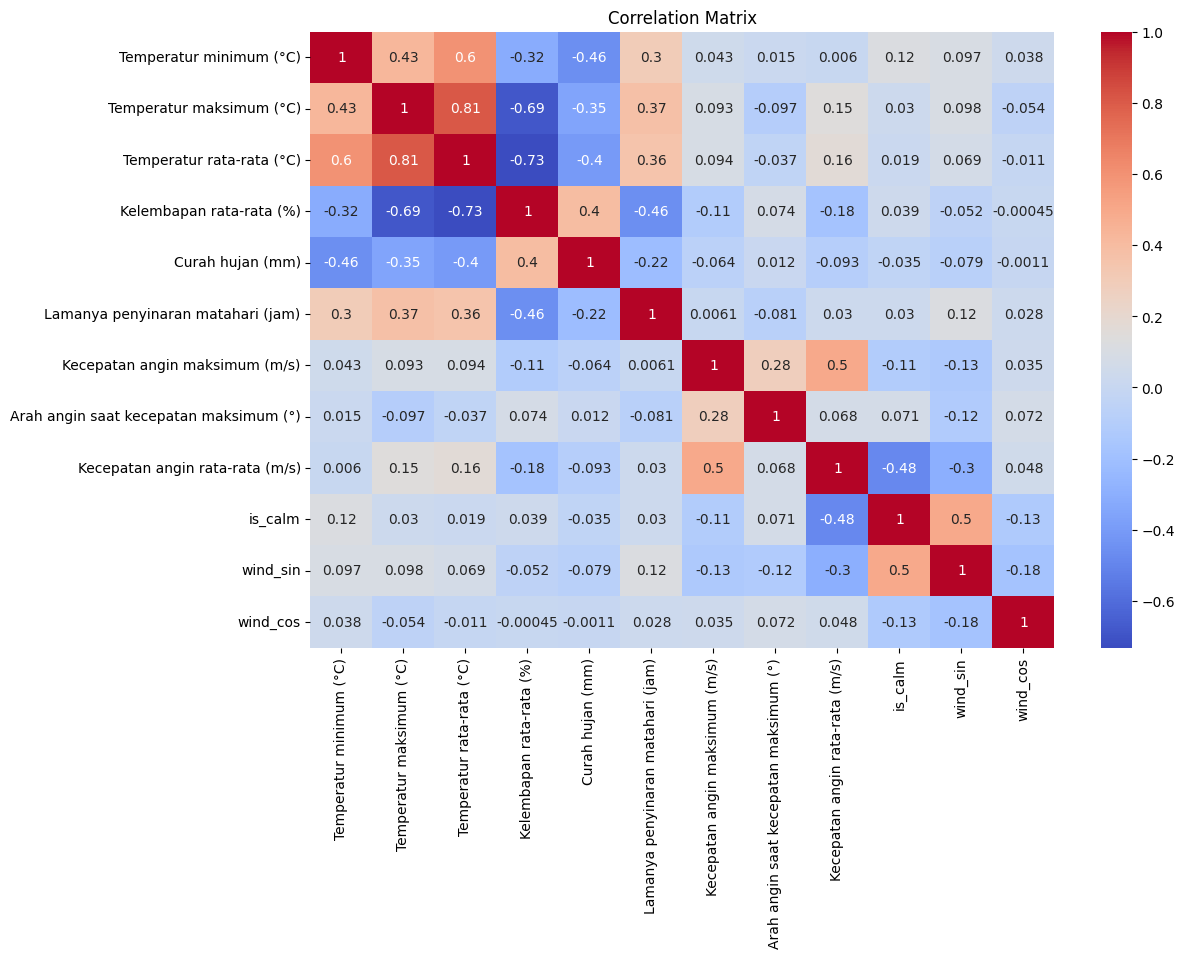

In [21]:
numeric_cols = df.select_dtypes(include=np.number).columns  
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()